<a href="https://colab.research.google.com/github/divyasri27k/Data-Science-Project-Code-Soft/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-4: SALES PREDICTION USING PYTHON

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [21]:
big_mart_data = pd.read_csv('/content/train.csv')

<ipython-input-21-7a8f22f32703>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  big_mart_data = pd.read_csv('/content/train.csv')


In [22]:
big_mart_data.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1.0,0,1.0
1,2,5,2015-07-31,6064,625,1,1.0,0,1.0


In [23]:
big_mart_data.shape

(224069, 9)

In [24]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224069 entries, 0 to 224068
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          224069 non-null  int64  
 1   DayOfWeek      224069 non-null  int64  
 2   Date           224069 non-null  object 
 3   Sales          224069 non-null  int64  
 4   Customers      224069 non-null  int64  
 5   Open           224069 non-null  int64  
 6   Promo          224068 non-null  float64
 7   StateHoliday   224068 non-null  object 
 8   SchoolHoliday  224068 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 15.4+ MB


In [25]:
big_mart_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            1
StateHoliday     1
SchoolHoliday    1
dtype: int64

In [26]:
big_mart_data.duplicated().sum()

0

In [32]:
big_mart_data['Customers'].fillna(big_mart_data['Customers'].mean(), inplace=True)

In [34]:
# mode of "Sales" column
big_mart_data['Sales'].mode()

0    0
Name: Sales, dtype: int64

In [35]:
big_mart_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [36]:
mode_of_Sales = big_mart_data.pivot_table(values='Sales',columns='StateHoliday',aggfunc=lambda x: x.mode()[0])

In [37]:
mode_of_Sales

StateHoliday,0.0,0,a,b
Sales,0,0,0,0


In [38]:
miss_values = big_mart_data['Sales'].isnull()

In [39]:
miss_values.value_counts()

Sales
False    224069
Name: count, dtype: int64

In [40]:
miss_values = big_mart_data['Sales'].isnull()
big_mart_data.loc[miss_values, 'Sales'] = big_mart_data.loc[miss_values,'StateHoliday'].apply(lambda x: mode_of_outlet_size[x])
# This line of code is using the Pandas loc method to locate missing values in the Sales column of the big_mart_data
# dataset.
#The miss_values variable is assumed to be a Boolean mask that filters out rows where the Sales column has
#a missing or null value.
#The code then assigns a new value to the Sales column for these missing values.
# The new value is determined based on the corresponding value in the StateHoliday column for each row,
# using the mode_of_Sales variable as a lookup table.
# The apply() method is used to apply a function to each value in the filtered StateHoliday column.
#In this case, the function being applied is a lambda function that takes each value of x
#(i.e., each value in the StateHoliday column) and looks up the corresponding value in the mode_of_Sales dictionary.

In [41]:
# checking for missing values
big_mart_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            1
StateHoliday     1
SchoolHoliday    1
dtype: int64

In [42]:
big_mart_data.describe()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday
count,224069.000000,224069.000000,224069.000000,224069.000000,224068.000000,224068.000000
mean,557.890270,3.975735,629.085733,0.835970,0.397884,0.138172
std,321.815215,1.993369,451.569731,0.370303,0.489462,0.345082
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,417.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,824.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000


2 EDA (Exploratory Data Analysis)

<ipython-input-43-e338bd7d2b3d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Customers'])


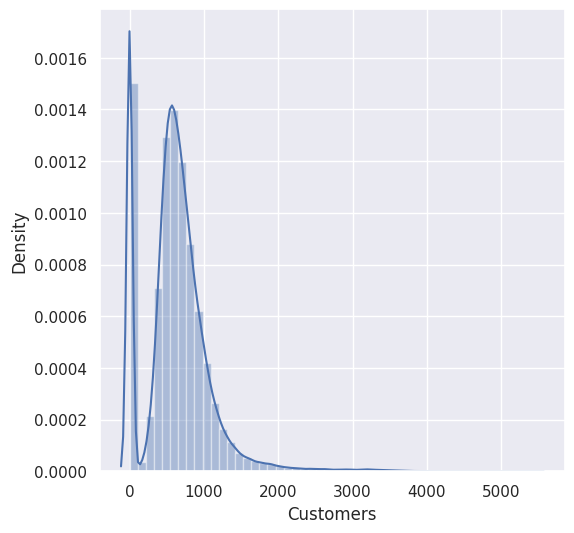

In [43]:
# Customers distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Customers'])
plt.show()

<ipython-input-44-045b8d1add01>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Promo'])


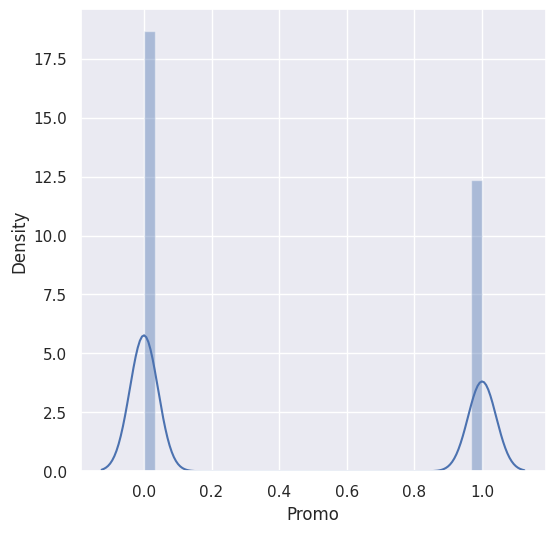

In [44]:
# Promo distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Promo'])
plt.show()

<ipython-input-45-f43009267f09>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Open'])


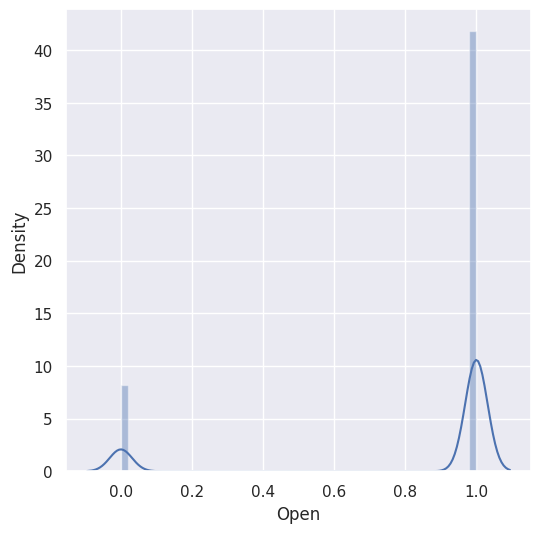

In [45]:
# Open distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Open'])
plt.show()

<ipython-input-46-4597e0c01307>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Sales'])


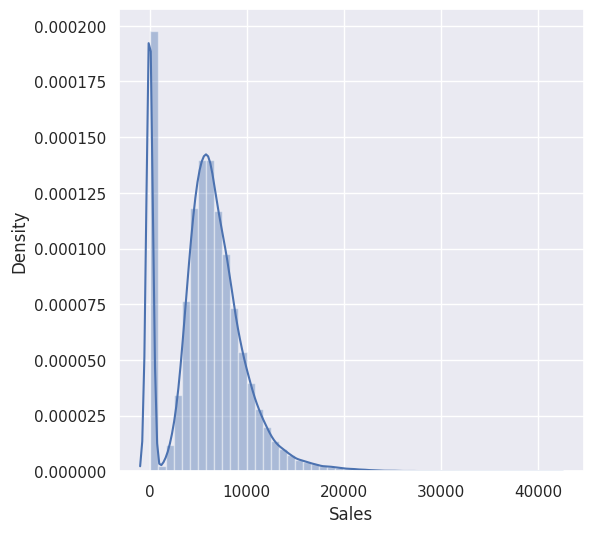

In [46]:
# Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Sales'])
plt.show()

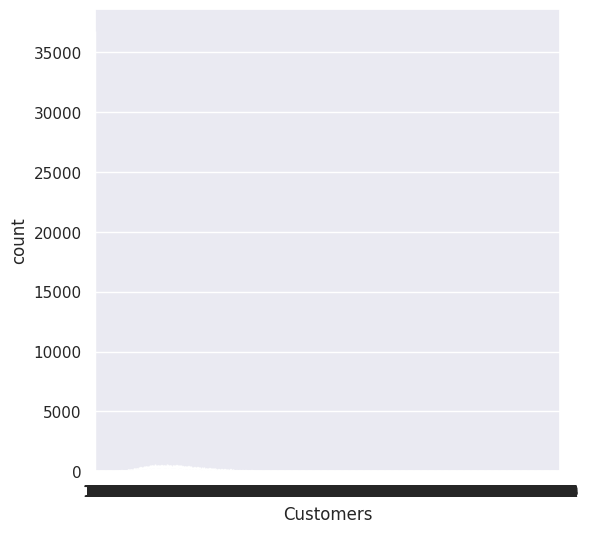

In [47]:
# Customers column
plt.figure(figsize=(6,6))
sns.countplot(x='Customers', data=big_mart_data)
plt.show()

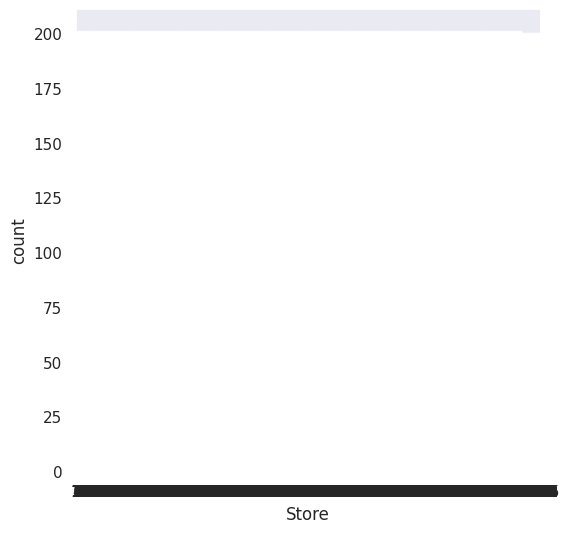

In [48]:
# Store column
plt.figure(figsize=(6,6))
sns.countplot(x='Store', data=big_mart_data)
plt.show()

In [49]:
big_mart_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1.0,0,1.0
1,2,5,2015-07-31,6064,625,1,1.0,0,1.0
2,3,5,2015-07-31,8314,821,1,1.0,0,1.0
3,4,5,2015-07-31,13995,1498,1,1.0,0,1.0
4,5,5,2015-07-31,4822,559,1,1.0,0,1.0
